# Data preprocessing for the "diabetes.csv" dataset

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer as Imputer
import numpy as np
import random

np.random.seed(42)
random.seed(42)

## Reading in the dataset
### Einlesen des Datensatzes und Ausgabe der ersten 10 Zeilen:

In [187]:
def read_data():
    df = pd.read_csv("../data/diabetes.csv")
    return df

diabetes = read_data()
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Checking the dataset information
### Mit .info() können wir uns einen Überblick über die Daten und Datentypen verschaffen:

In [188]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking the dataset values
### Mit .describe() können wir uns die wichtigsten statistischen Werte der Daten anzeigen lassen:

In [189]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Mit .isnull().sum() können wir uns die Anzahl der fehlenden Werte pro Spalte anzeigen lassen:

In [190]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Es gibt keine fehlenden Werte in diesem Datensatz. Aber bedeutet das, dass die Daten sauber sind? Nein, es gibt immer noch einige Probleme, die wir beheben müssen:

## Visualisierte Darstellung der Daten
### Wir lassen uns die Daten als Histogramm anzeigen, um einen Überblick über die Verteilung der Daten zu bekommen:

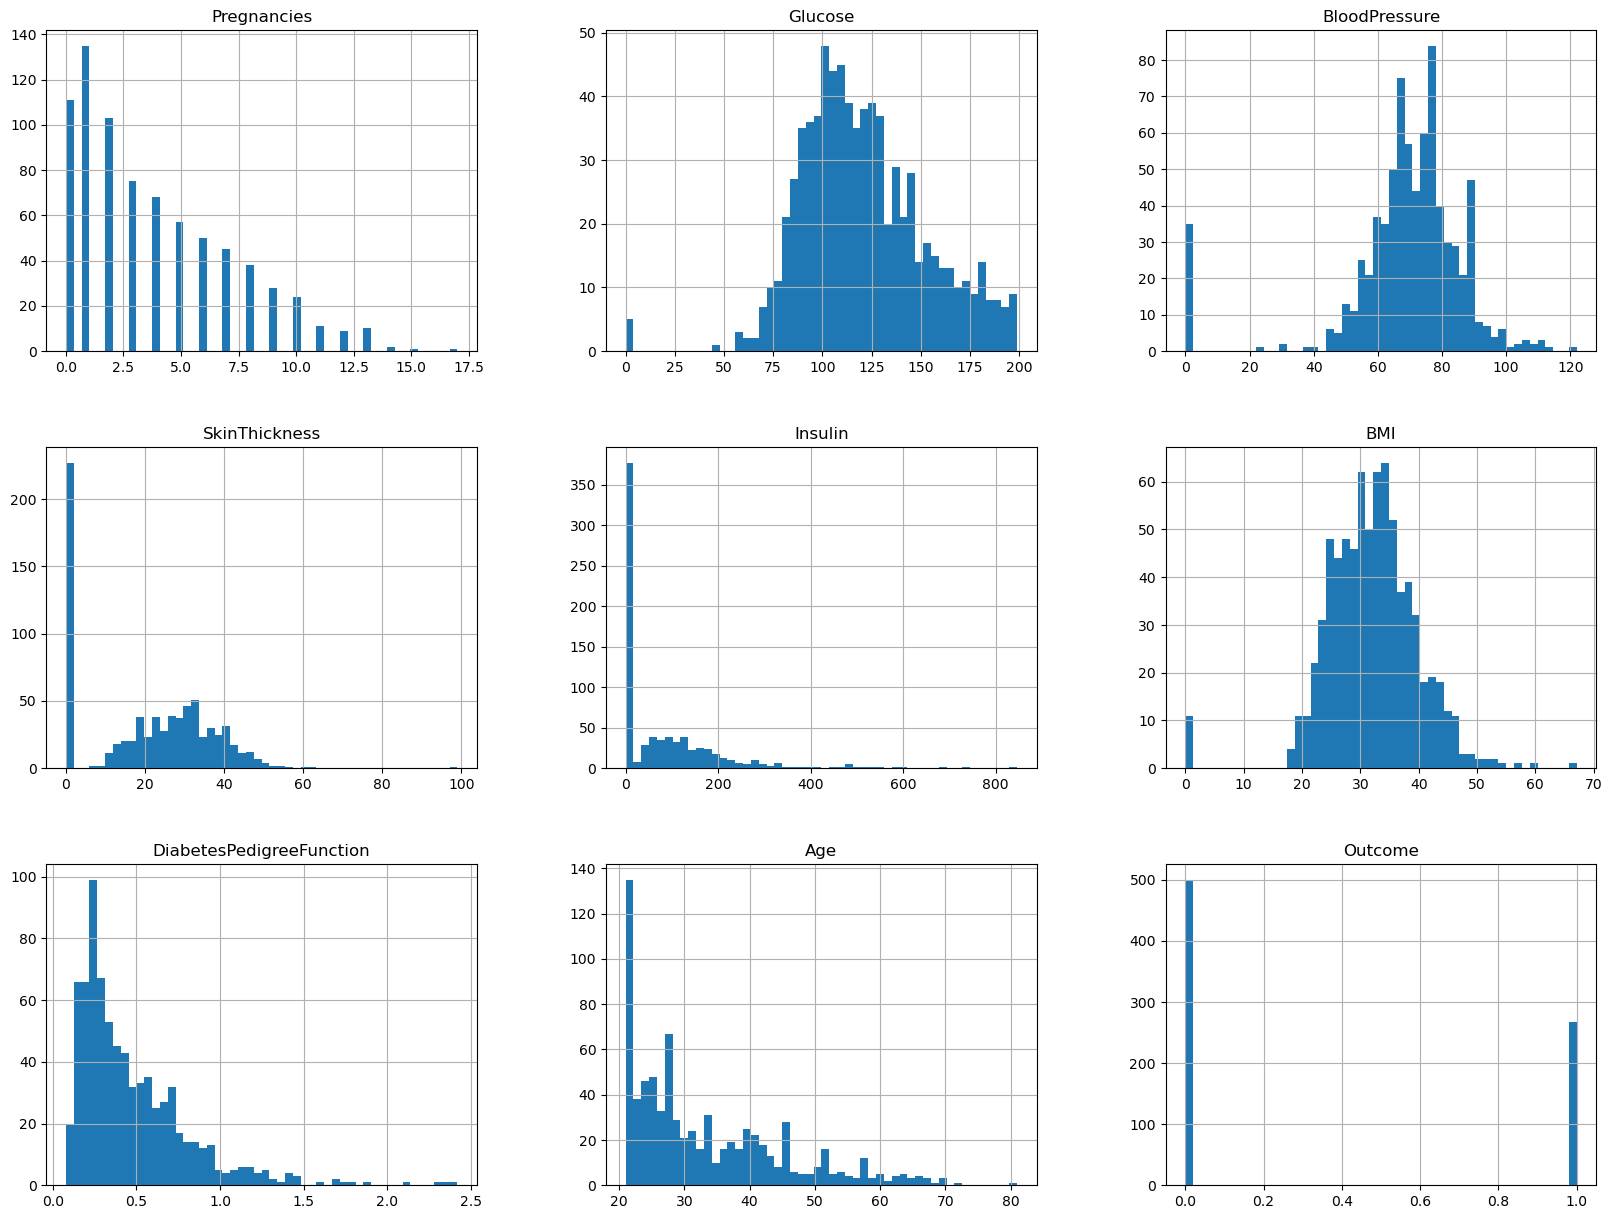

In [191]:
diabetes.hist(bins=50, figsize=(20, 15))
plt.show()

### Es fällt auf das es sehr viele 0 Werte gibt, welche mit .isnull() nicht erkannt wurden. Diese 0 Werte sind nicht sinnvoll und müssen daher ersetzt werden.

## Visualisierung der Correlation Matrix
### Mit der Correlation Matrix können wir uns die Korrelationen zwischen den einzelnen Spalten anzeigen lassen:

In [192]:
diabetes.corr().style.background_gradient(cmap='summer')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Feature Engineering
### Feature Selektion: Man könnte die Features BloodPressure und SkinThickness entfernen, da sie eine geringe Korrelation mit der Zielvariable haben.

In [193]:
# for feature in ['BloodPressure', 'SkinThickness']:
#     diabetes.drop(feature, axis=1, inplace=True)

# diabetes.head()

## Train-Test Split
### Wir teilen die Daten in 80% Trainingsdaten und 20% Testdaten auf und permutieren die Daten, um eine zufällige Verteilung zu erhalten

### Wir nutzen StratisfiedShuffleSplit, um eine gleichmäßige Verteilung der Klassen in den Trainings- und Testdaten zu gewährleisten:

In [194]:
shufflesplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_id, test_id in shufflesplit.split(diabetes, diabetes['Outcome']):
    train_set = diabetes.loc[train_id]
    test_set = diabetes.loc[test_id]

## Input Label Split
### Wir trennen die Features von den Labels:

In [195]:
def get_labels(train_set, test_set):
    train_labels = train_set['Outcome']
    test_labels = test_set['Outcome']
    return train_labels, test_labels

In [196]:
train_labels = train_set['Outcome']
test_labels = test_set['Outcome']

train_full = train_set.copy()

for set_ in (train_set, test_set):
    set_.drop('Outcome', axis=1, inplace=True)

## Data Cleaning

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

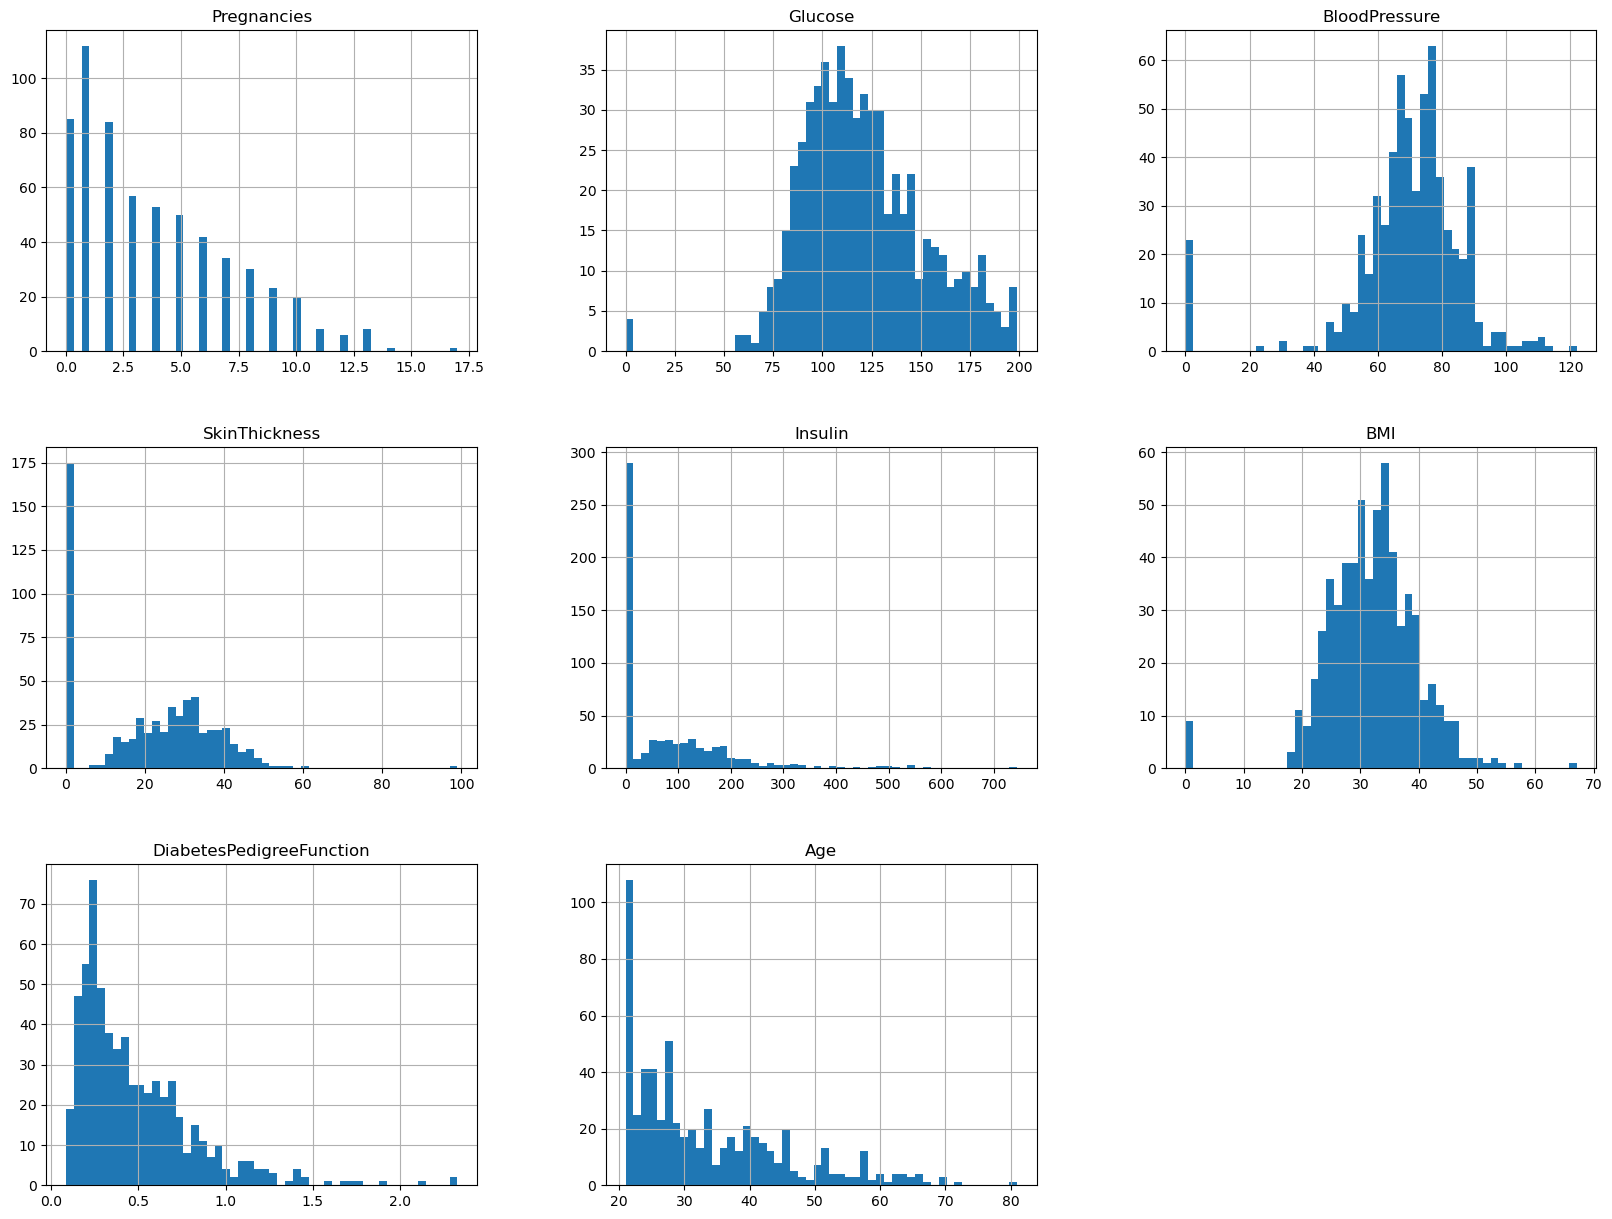

In [197]:
train_set.hist(bins=50, figsize=(20, 15))

## Ersetzen von 0 Werten
### Wir ersetzen die 0 Werte in den Spalten Glucose und BMI durch den Durchschnittswert der jeweiligen Spalte:

In [198]:
imp = Imputer(strategy='mean')

columns = ['Glucose','BMI', 'Insulin', 'BloodPressure', 'SkinThickness']

train_set[columns] = train_set[columns].replace(0, np.nan)
test_set[columns] = test_set[columns].replace(0, np.nan)

train_set[columns] = imp.fit_transform(train_set[columns])

# Dasselbe Imputer-Objekt für das Testset verwenden (nur transform, kein fit!)
test_set[columns] = imp.transform(test_set[columns])

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

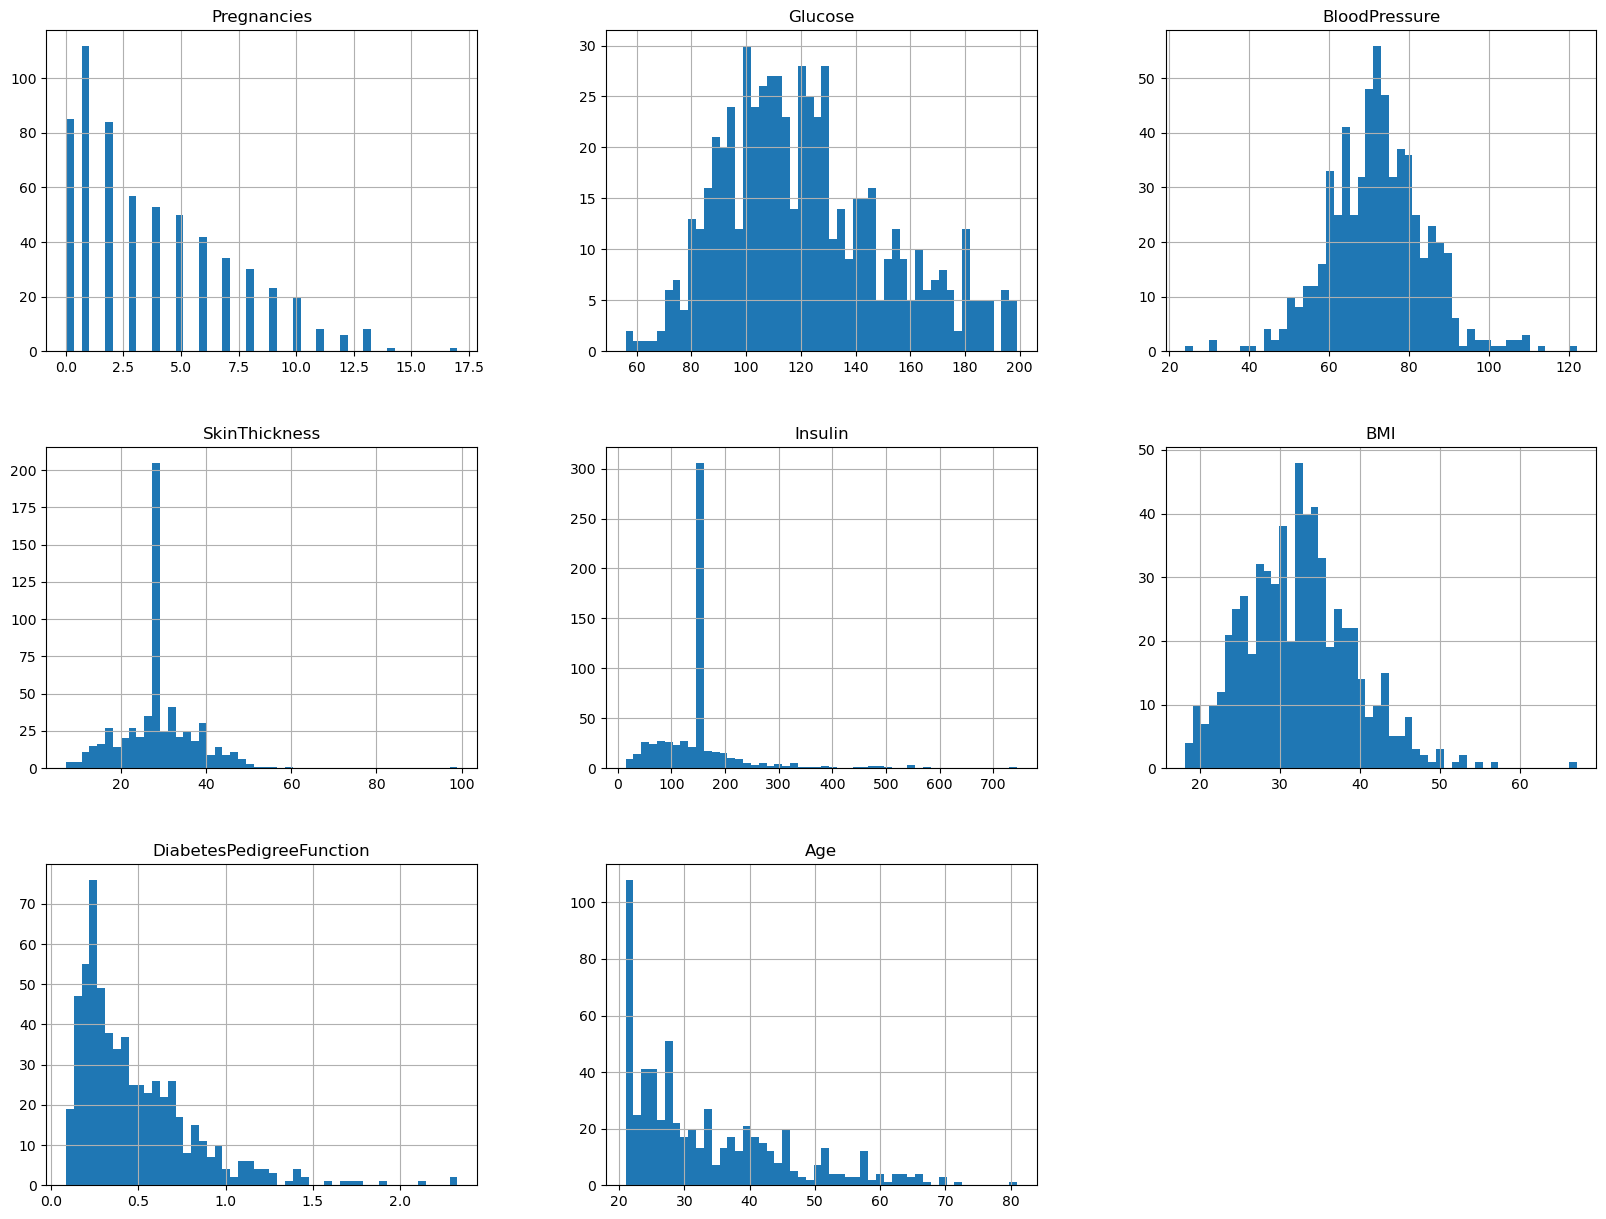

In [199]:
train_set.hist(bins=50, figsize=(20, 15))


## Class Balancing
### Wir balancieren die Klassen, um die Modelle zu verbessern:

In [200]:
train_shuffled = train_full.sample(frac=1, random_state=42)

diab_train = train_shuffled.loc[train_shuffled['Outcome'] == 1]
num_instances = len(diab_train)
nodiab_train = train_shuffled.loc[train_shuffled['Outcome'] == 0][:num_instances]
print(len(diab_train), len(nodiab_train))

train_sub = pd.concat([diab_train, nodiab_train])

train_sub = train_sub.sample(frac=1, random_state=42)


214 214


### Als nächstes: Oversampling

In [201]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(train_set, train_labels)

print(y_over.value_counts())

Outcome
0    400
1    400
Name: count, dtype: int64


## Feature Scaling
### Wir skalieren die Daten, um die Modelle zu verbessern:

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set_scaled = scaler.fit_transform(X_over)
test_set_scaled = scaler.transform(test_set)

train_set_scaled = pd.DataFrame(train_set_scaled, columns=X_over.columns, index=X_over.index)
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns, index=test_set.index)

train_set_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.899768,-1.178162,-0.888324,-2.040268,-1.466641,-0.854010,0.269334,-0.875651
1,0.272091,-0.005193,0.441041,-0.309269,-1.747914,-0.498511,-0.159242,0.491552
2,-0.606803,-0.689425,-1.220665,1.190931,-0.783552,0.286549,-0.809703,-0.790201
3,-0.899768,0.646456,-1.386835,-0.071634,-0.045853,-0.483699,0.220701,-0.448400
4,-1.192732,-1.015250,-0.722153,1.075531,-0.636219,1.723357,-0.381128,-1.046551


## Save the preprocessed data
### Wir speichern die vorverarbeiteten Daten in einer CSV-Datei:

In [203]:
y_over.to_csv('../data/train_labels.csv', index=False)
test_labels.to_csv('../data/test_labels.csv', index=False)
train_set_scaled.to_csv('../data/train_set.csv', index=False)
test_set_scaled.to_csv('../data/test_set.csv', index=False)